In [31]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#Loading the data
df=pd.read_excel(r"C:\Users\sahan\Downloads\Walmart Sales.xlsx")

In [33]:
#Exploring the data
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


In [34]:
#Exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
 11  Rating         1000 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [35]:
#Grouping by city and branch
city_branch_sales=df.groupby(['City','Branch'])[['Unit price','Quantity']].sum()
city_branch_revenue= city_branch_sales['Unit price']*city_branch_sales['Quantity']
print(city_branch_sales)
print(city_branch_revenue)

                  Unit price  Quantity
City      Branch                      
Mandalay  A          6349.11       637
          B          6623.73       664
          C          5506.04       519
Naypyitaw A          5953.55       648
          B          6298.64       604
          C          6315.57       579
Yangon    A          6342.88       598
          B          6329.25       631
          C          5953.36       630
City       Branch
Mandalay   A         4044383.07
           B         4398156.72
           C         2857634.76
Naypyitaw  A         3857900.40
           B         3804378.56
           C         3656715.03
Yangon     A         3793042.24
           B         3993756.75
           C         3750616.80
dtype: float64


Text(0.5, 0, 'City,Branch')

<Figure size 1000x600 with 0 Axes>

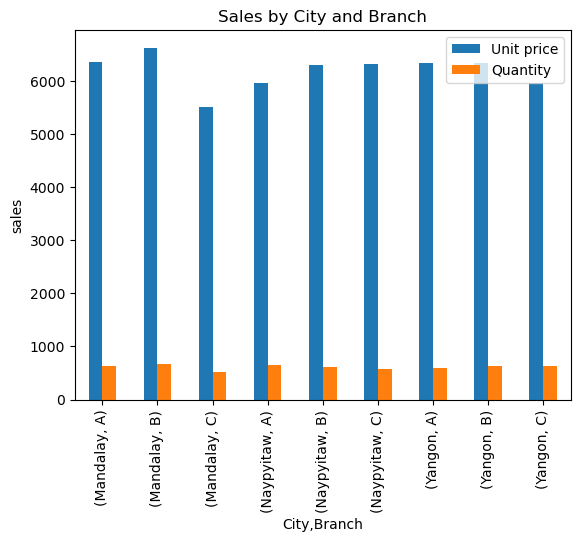

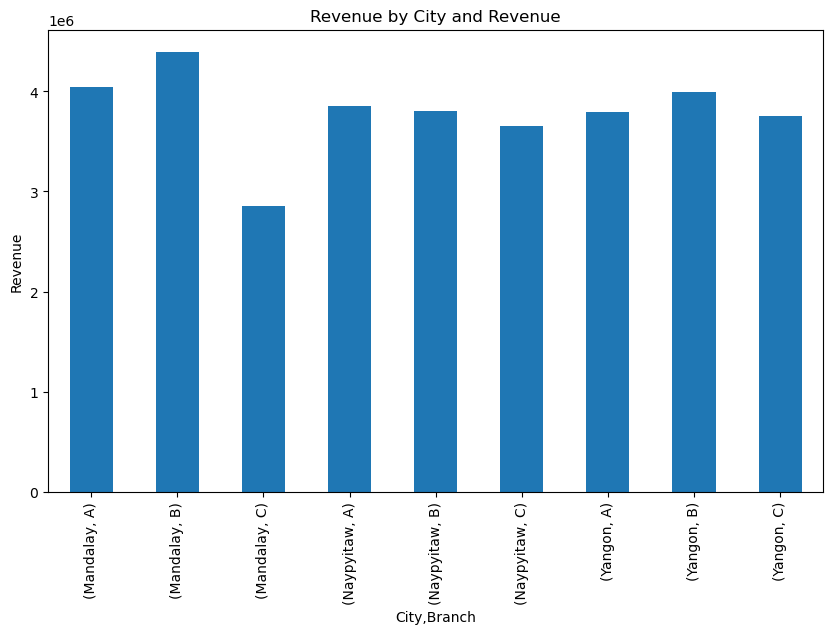

In [36]:
#Plotting sales and revenue
plt.figure(figsize=(10,6))
city_branch_sales.plot(kind='bar', title='Sales by City and Branch')
plt.ylabel('sales')
plt.xlabel('City,Branch')

plt.figure(figsize=(10,6))
city_branch_revenue.plot(kind='bar', title='Revenue by City and Revenue')
plt.ylabel('Revenue')
plt.xlabel('City,Branch')

In [37]:
#Grouping by City and Branch and Calculating the average price
avg_price_by_branch= df.groupby(['City','Branch'])['Unit price'].mean()
#Displaying the average prices
print(avg_price_by_branch)

City       Branch
Mandalay   A         53.353866
           B         56.133305
           C         57.958316
Naypyitaw  A         54.123182
           B         57.785688
           C         57.941009
Yangon     A         55.639298
           B         56.011062
           C         52.684602
Name: Unit price, dtype: float64


In [38]:
#Preprocessing the date column to extract month and year
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [39]:
#Filtering data for april 2019
april_2019_data=df[(df['Month']==4)&(df['Year']==2019)]
#grouping by product line. gender and payment method and aggregate sales and revenue
grouped_data=april_2019_data.groupby(['Product line', 'Gender', 'Payment']).agg(Total_Sales=('Quantity','sum'),Total_Revenue=('Unit price','sum')).reset_index()



In [40]:
#Calculating total sales quantity and revenue for april 2019
total_sales_april=grouped_data['Total_Sales'].sum()
total_revenue_april=grouped_data['Total_Revenue'].sum()
average_price_april=total_revenue_april/total_sales_april if total_sales_april>0 else 0
#Identifying focus areas for better sales in April 2019
focus_areas=grouped_data.groupby(['Product line','Gender','Payment']).sum().sort_values(by='Total_Sales',ascending=False).head(3)
print(f"Total Sales in April 2019: {total_sales_april}")
print(f"Total Revenue in April 2019: {total_revenue_april}")
print(f"Average Price in April 2019: {average_price_april}")
print("Focus Areas for Better Sales in April 2019:")
print(focus_areas)

Total Sales in April 2019: 0
Total Revenue in April 2019: 0.0
Average Price in April 2019: 0
Focus Areas for Better Sales in April 2019:
Empty DataFrame
Columns: [Total_Sales, Total_Revenue]
Index: []


In [1]:
#The code did not find any data for April 2019 on the dataset, which resulted in empty ornull values for the sales quantity.